<a href="https://colab.research.google.com/github/lateefurrahman/ASSI-3/blob/master/Cat_dog_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
#from google.colab import drive
#drive.mount('/content/drive')
!pwd
#!ls -ahl drive/My\ Drive|grep dogs
!unzip "//content//drive//My Drive//dogs-vs-cats.zip" 
#sourceZipFile = "//content//drive//My Drive//dogs-vs-cats.zip"
#print(os.path.exists(sourceZipFile))



/content
Archive:  //content//drive//My Drive//dogs-vs-cats.zip
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of //content//drive//My Drive//dogs-vs-cats.zip or
        //content//drive//My Drive//dogs-vs-cats.zip.zip, and cannot find //content//drive//My Drive//dogs-vs-cats.zip.ZIP, period.


In [9]:
!unzip train.zip
#!unzip test1.zip
!mkdir source_data
!mv train source_data
#!mv test1 source_data
#!mv sampleSubmission.csv source_data

unzip:  cannot find or open train.zip, train.zip.zip or train.zip.ZIP.
mkdir: cannot create directory ‘source_data’: File exists
mv: cannot stat 'train': No such file or directory


In [10]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

--2020-04-14 17:33:01--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.126.128, 2a00:1450:4013:c01::80
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.126.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M  57.5MB/s    in 1.1s    

2020-04-14 17:33:03 (57.5 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [0]:
import os
import zipfile

local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [0]:
base_dir = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [13]:
train_cat_fnames = os.listdir(train_cats_dir)
print(train_cat_fnames[:10])

train_dog_fnames = os.listdir(train_dogs_dir)
train_dog_fnames.sort()
print(train_dog_fnames[:10])

['cat.134.jpg', 'cat.338.jpg', 'cat.821.jpg', 'cat.723.jpg', 'cat.439.jpg', 'cat.421.jpg', 'cat.372.jpg', 'cat.753.jpg', 'cat.362.jpg', 'cat.64.jpg']
['dog.0.jpg', 'dog.1.jpg', 'dog.10.jpg', 'dog.100.jpg', 'dog.101.jpg', 'dog.102.jpg', 'dog.103.jpg', 'dog.104.jpg', 'dog.105.jpg', 'dog.106.jpg']


In [14]:
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500


In [0]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

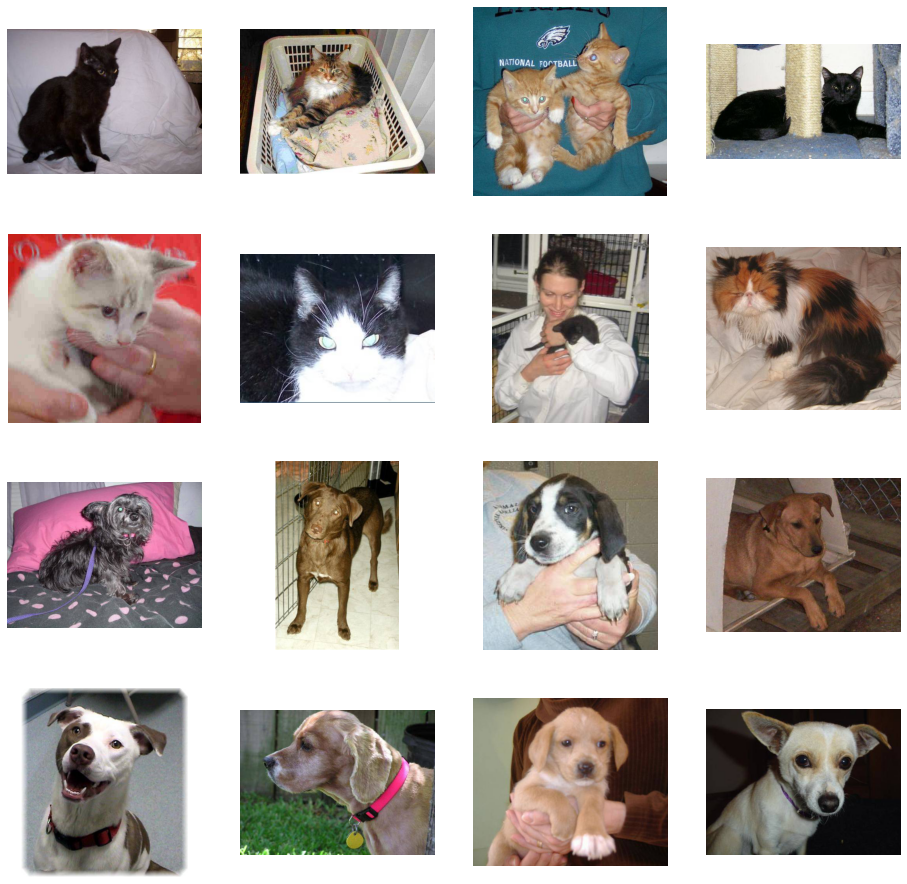

In [16]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_cat_pix = [os.path.join(train_cats_dir, fname) 
                for fname in train_cat_fnames[pic_index-8:pic_index]]
next_dog_pix = [os.path.join(train_dogs_dir, fname) 
                for fname in train_dog_fnames[pic_index-8:pic_index]]

for i, img_path in enumerate(next_cat_pix+next_dog_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()


In [0]:
from tensorflow.keras import layers
from tensorflow.keras import Model

In [0]:
from tensorflow.keras import datasets, layers, models, optimizers

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))


In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [0]:
from tensorflow.keras import optimizers

model.compile(loss='binary_crossentropy',
optimizer=optimizers.RMSprop(lr=1e-4),
metrics=['acc'])

In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [22]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150), 
    batch_size=20,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [23]:
#testing
#print(type(train_generator))
counter =0
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    print(labels_batch[counter])
    counter += 1
    print(counter)
    if counter > 3:
        break
print(counter)        

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)
1.0
1
data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)
1.0
2
data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)
1.0
3
data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)
1.0
4
4


In [26]:
history = model.fit_generator(
train_generator,
steps_per_epoch=100,
epochs=30,
validation_data=validation_generator,
validation_steps=50)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/30
100/100 [==============================] - 9s 92ms/step - loss: 0.1707 - acc: 0.9415 - val_loss: 0.5882 - val_acc: 0.7440
Epoch 2/30
100/100 [==============================] - 9s 91ms/step - loss: 0.1560 - acc: 0.9470 - val_loss: 0.6108 - val_acc: 0.7770
Epoch 3/30
100/100 [==============================] - 9s 89ms/step - loss: 0.1419 - acc: 0.9520 - val_loss: 0.6954 - val_acc: 0.7440
Epoch 4/30
100/100 [==============================] - 9s 91ms/step - loss: 0.1308 - acc: 0.9565 - val_loss: 0.7990 - val_acc: 0.7160
Epoch 5/30
100/100 [==============================] - 9s 90ms/step - loss: 0.1081 - acc: 0.9675 - val_loss: 0.7003 - val_acc: 0.7520
Epoch 6/30
100/100 [==============================] - 9s 90ms/step - loss: 0.0942 - acc: 0.9730 - val_loss: 0.7085 - val_acc: 0.7780
Epoch 7/30
100/100 [==============================] - 9s 89ms/step - loss: 0.0864 - acc: 0.9715 - val_loss: 0.7713 - val_acc: 

In [0]:
model.save('cats_and_dogs_small_1.h5')

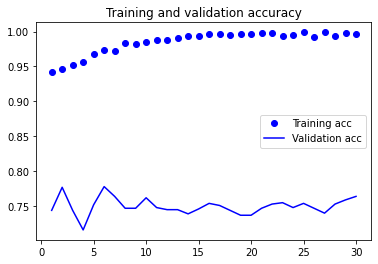

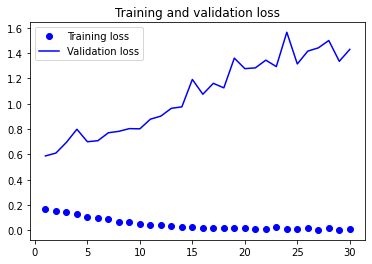

In [29]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [0]:
datagen = ImageDataGenerator(
rotation_range=40,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,
fill_mode='nearest')

Using TensorFlow backend.


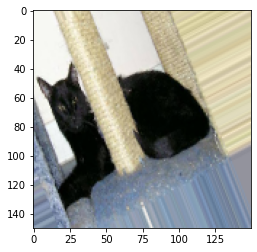

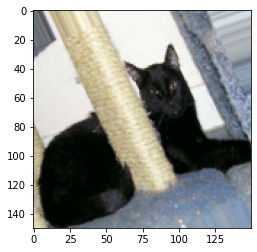

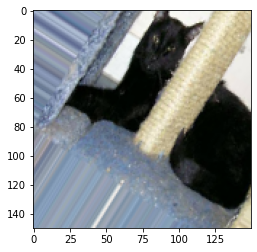

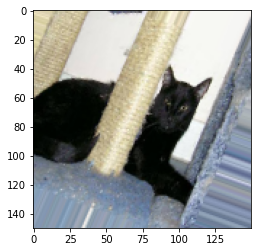

In [31]:
#Listing 5.12 Displaying some randomly augmented training images
from keras.preprocessing import image
fnames = [os.path.join(train_cats_dir, fname) for
fname in os.listdir(train_cats_dir)]
img_path = fnames[3]
img = image.load_img(img_path, target_size=(150, 150))
x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
plt.show()

In [0]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
optimizer=optimizers.RMSprop(lr=1e-4),
metrics=['acc'])

In [33]:
#Listing 5.14 Training the convnet using data-augmentation generators
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary')



Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [35]:
history = model.fit(
    train_generator,
    steps_per_epoch=100,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=50)


Epoch 1/100
100/100 [==============================] - 28s 279ms/step - loss: 0.6940 - acc: 0.5116 - val_loss: 0.6793 - val_acc: 0.6015
Epoch 2/100
100/100 [==============================] - 27s 274ms/step - loss: 0.6815 - acc: 0.5679 - val_loss: 0.6668 - val_acc: 0.5838
Epoch 3/100
100/100 [==============================] - 28s 275ms/step - loss: 0.6653 - acc: 0.5898 - val_loss: 0.6313 - val_acc: 0.6618
Epoch 4/100
100/100 [==============================] - 27s 272ms/step - loss: 0.6514 - acc: 0.6032 - val_loss: 0.6066 - val_acc: 0.6740
Epoch 5/100
100/100 [==============================] - 27s 272ms/step - loss: 0.6360 - acc: 0.6294 - val_loss: 0.6643 - val_acc: 0.5964
Epoch 6/100
100/100 [==============================] - 27s 271ms/step - loss: 0.6231 - acc: 0.6433 - val_loss: 0.6275 - val_acc: 0.6372
Epoch 7/100
100/100 [==============================] - 27s 272ms/step - loss: 0.6030 - acc: 0.6749 - val_loss: 0.7247 - val_acc: 0.5767
Epoch 8/100
100/100 [===========================

In [0]:
model.save('cats_and_dogs_small_2.h5')

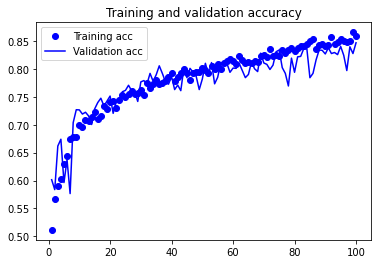

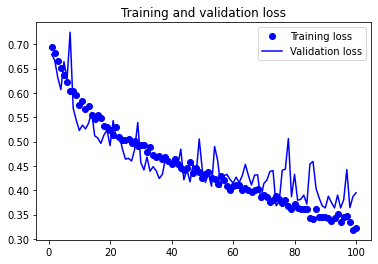

In [38]:

#model, history = loadData(iteration = 1)

#Listing 5.10 Displaying curves of loss and accuracy during training
import matplotlib.pyplot as plt
%matplotlib inline  

history = history.history
acc = history['acc']
val_acc = history['val_acc']
loss = history['loss']
val_loss = history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

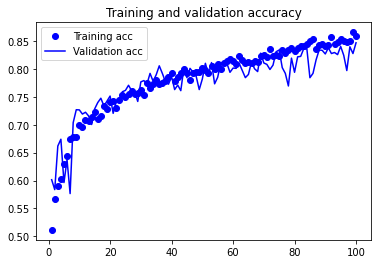

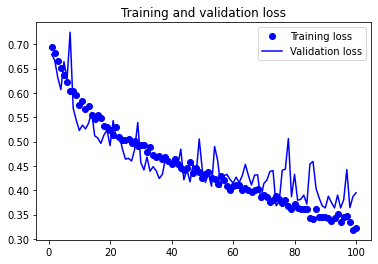

In [40]:

#model, history = loadData(iteration = 1)

#Listing 5.10 Displaying curves of loss and accuracy during training
import matplotlib.pyplot as plt
%matplotlib inline  

val_acc = history['val_acc']
loss = history['loss']
val_loss = history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()